In [1]:
import pandas as pd
import numpy as np
import requests
import json
import tweepy
import matplotlib.pyplot as plt

In [2]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

## 1- Data Gathering

In [3]:
# create the first dataframe to store twitter-archive-enhanced.csv file
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
# downloading image_predictions.tsv file programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#writing the content of response to a file
with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)
    
# create the second dataframe to store the image_predications.tsv file
df_dog_breeds = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
# store tweets data in tweet_json.txt file

fails_dict= {} # tweets we couldn't find
with open ('tweet_json.txt', 'w') as file:
    for tweet_id in df_twitter_archive.tweet_id:
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except tweepy.TweepError as e:
            fails_dict[tweet_id] = e
            pass

In [6]:
# read the "tweet_json.txt" line be line and
# each line is a dictionary, so can access the data we need
# in each line and store in list. After we finish, we will
# convert the list of dictionary into a datafram

tweets_list = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        json_line = json.loads(line)
        tweets_list.append({
            'tweet_id': json_line['id'],
            'created_at': json_line['created_at'],
            'retweet_count': json_line['retweet_count'],
            'favorite_count': json_line['favorite_count']
        })

In [7]:
# create the third dataframe df_tweets
df_tweets = pd.DataFrame(tweets_list, columns=['tweet_id', 'retweet_count', 'favorite_count', 'created_at'])

In [8]:
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
df_dog_breeds

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
df_tweets

,tweet_id,retweet_count,favorite_count,created_at
0,892420643555336193,7692,36127,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,5689,31161,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,3774,23474,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,7858,39411,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,8467,37635,Sat Jul 29 16:00:24 +0000 2017
5,891087950875897856,2838,18966,Sat Jul 29 00:08:17 +0000 2017
6,890971913173991426,1846,11036,Fri Jul 28 16:27:12 +0000 2017
7,890729181411237888,17164,60853,Fri Jul 28 00:22:40 +0000 2017
8,890609185150312448,3908,26088,Thu Jul 27 16:25:51 +0000 2017
9,890240255349198849,6677,29845,Wed Jul 26 15:59:51 +0000 2017


## 2- Assess Data

In [11]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

- timestamp shouldn't of type oject
- missing values in mutiple columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted, status_timestamp)
- dog stages are in four columns

In [12]:
df_dog_breeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- tweet_id should of type object not int

In [13]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 4 columns):
tweet_id          877 non-null int64
retweet_count     877 non-null int64
favorite_count    877 non-null int64
created_at        877 non-null object
dtypes: int64(3), object(1)
memory usage: 27.5+ KB


- tweet_id column should be string not int
- created_at column should be date not string.

In [14]:
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [15]:
df_twitter_archive[['tweet_id','text', 'rating_numerator','rating_denominator', 'name']]


,tweet_id,text,rating_numerator,rating_denominator,name
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Darla
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin
5,891087950875897856,Here we have a majestic great white breaching ...,13,10,None
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax
7,890729181411237888,When you watch your owner call another dog a g...,13,10,None
8,890609185150312448,This is Zoey. She doesn't want to be one of th...,13,10,Zoey
9,890240255349198849,This is Cassie. She is a college pup. Studying...,14,10,Cassie


- at tweet_id = 666287406224695296, rating_numerator and rating_denominator are extrated wrong. they should be 9 and 10 instead of 1 and 2

In [16]:
df_twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

- some values in the rating_denominator are greater than 10

In [17]:
df_twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Lola           10
Penny          10
Tucker         10
Bo              9
Winston         9
Sadie           8
the             8
Buddy           7
Daisy           7
Bailey          7
an              7
Toby            7
Koda            6
Milo            6
Stanley         6
Jack            6
Bella           6
Oscar           6
Rusty           6
Jax             6
Leo             6
Dave            6
Scout           6
Oakley          5
             ... 
Tayzie          1
Suki            1
Devón           1
Traviss         1
Amy             1
Iggy            1
Hall            1
Millie          1
Crumpet         1
Wishes          1
Harrison        1
O               1
Binky           1
Pete            1
Joey            1
Danny           1
Crouton         1
officially      1
Barry           1
Tilly           1
Kobe            1
Heinrich        1
Kingsley        1
Rizzo           1
Venti     

 - there are values in the name column extracted wrong. As you can see above, there are 745 values = "None", 55 = the "a" letter. 

In [18]:
df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

- outliers in the rating_numerator column

In [19]:
df_twitter_archive[['tweet_id','text', 'rating_numerator','rating_denominator']][df_twitter_archive.rating_numerator > 14]

,tweet_id,text,rating_numerator,rating_denominator
55,881633300179243008,@roushfenway These are good dogs but 17/10 is ...,17,10
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10...,420,10
189,855860136149123072,@s8n You tried very hard to portray this good ...,666,10
285,838916489579200512,RT @KibaDva: I collected all the good dogs!! 1...,15,10
290,838150277551247360,@markhoppus 182/10,182,10
291,838085839343206401,@bragg6of8 @Andy_Pace_ we are still looking fo...,15,10
313,835246439529840640,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who liv...",75,10
433,820690176645140481,The floofs have been released I repeat the flo...,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7


- decimal ratings aren't extracted properly (tweet_id = 832215909146226688)

### Data Quality Issues
- tweet_id in the three dataframe is int.It shold be string
- timestamp in the df_arhcive is string
- missing values in mutiple columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted, status_timestamp)
- some values in the rating_denominator are greater than 10
- retweets in the df_archive table
- there are values in the name column extracted wrong from the tweet's text
- outliers in the rating_numerator column
- at tweet_id = 666287406224695296, rating_numerator and rating_denominator are extrated wrong. they should be 9 and 10 instead of 1 and 2
- decimal ratings aren't extracted properly (tweet_id = 786709082849828864)
- ratings should be float ranging 0 to 1.4 since we have decimal values



### Data Tidiness Issues
- dog stages are in four columns
- tweets info separated in two tables (df_archive_tweets and df_tweets)
- dog breed should be a column in the combined table

## 3- Data Cleaning

In [20]:
# create a copy df_twitter_archiver. This copy will be the cleaned version 
df_twitter_archive_cleaned = df_twitter_archive.copy()

In [21]:
df_tweets_clean = df_tweets.copy()
df_dog_breeds_clean = df_dog_breeds.copy()

### Define
- remove the retweets data from the df_twitter_archive table

### Code

In [22]:
# fitering out retweets
df_twitter_archive_cleaned = df_twitter_archive_cleaned[df_twitter_archive.retweeted_status_id.isna()]

### test

In [23]:
df_twitter_archive[df_twitter_archive.name == 'Canela']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None


In [24]:
df_twitter_archive_cleaned[df_twitter_archive_cleaned.name == 'Canela']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None


#### As you can see above, the original dataframe has the original tweet and the retweet. The cleaned dataframe doesn't have the retweet

In [25]:
# check if there are data in the retweeted_status_id column
df_twitter_archive_cleaned[~df_twitter_archive_cleaned.retweeted_status_id.isna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [26]:
# check if there are data in the retweeted_status_user_id column
df_twitter_archive_cleaned[~df_twitter_archive_cleaned.retweeted_status_user_id.isna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [27]:
# check if there are data in the rretweeted_status_timestamp column
df_twitter_archive_cleaned[~df_twitter_archive_cleaned.retweeted_status_timestamp.isna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Missing data

In [28]:
df_twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### Define
- Remove missing data
- we can drop retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp since they don't have any data
- we can also drop in_reply_to_status_id and in_reply_to_user_id since they a lot of missing data and we won't use them ain our analysis 

### Code

In [29]:
# drop columns with missing values
df_twitter_archive_cleaned.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',
                                 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace = True)

### Test

In [30]:
df_twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### Define
- Create one variable/column for the four dog stages

### Code

In [31]:
# reaplce None with empty string in the four columns
df_twitter_archive_cleaned.doggo.replace('None','', inplace=True)
df_twitter_archive_cleaned.floofer.replace('None','', inplace=True)
df_twitter_archive_cleaned.pupper.replace('None','', inplace=True)
df_twitter_archive_cleaned.puppo.replace('None','', inplace=True)
df_twitter_archive_cleaned[['text', 'doggo', 'floofer', 'pupper', 'puppo']]

,text,doggo,floofer,pupper,puppo
0,This is Phineas. He's a mystical boy. Only eve...,,,,
1,This is Tilly. She's just checking pup on you....,,,,
2,This is Archie. He is a rare Norwegian Pouncin...,,,,
3,This is Darla. She commenced a snooze mid meal...,,,,
4,This is Franklin. He would like you to stop ca...,,,,
5,Here we have a majestic great white breaching ...,,,,
6,Meet Jax. He enjoys ice cream so much he gets ...,,,,
7,When you watch your owner call another dog a g...,,,,
8,This is Zoey. She doesn't want to be one of th...,,,,
9,This is Cassie. She is a college pup. Studying...,doggo,,,


In [32]:
# create a new column (dog_stage) for the dog stages
df_twitter_archive_cleaned['dog_stage'] = df_twitter_archive_cleaned.doggo + df_twitter_archive_cleaned.floofer + df_twitter_archive_cleaned.pupper + df_twitter_archive_cleaned.puppo

In [33]:
df_twitter_archive_cleaned.dog_stage.value_counts()

                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

#### As you can see above there are some dogs with muliple stages.  we can sperate those instances with commas

In [34]:
df_twitter_archive_cleaned.loc[df_twitter_archive_cleaned.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_twitter_archive_cleaned.loc[df_twitter_archive_cleaned.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'
df_twitter_archive_cleaned.loc[df_twitter_archive_cleaned.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'

In [35]:
df_twitter_archive_cleaned.dog_stage.value_counts()

                  1831
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

#### we can now convert all the empty strings to NaN

In [36]:
df_twitter_archive_cleaned.dog_stage.replace('', np.nan, inplace=True)

#### Now we have one column that represents the dog stages. we can delete the other four columns

In [37]:
df_twitter_archive_cleaned.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

### Test

In [38]:
df_twitter_archive_cleaned.dog_stage.value_counts()

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

In [39]:
df_twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_stage             344 non-null object
dtypes: int64(3), object(6)
memory usage: 169.9+ KB


### Define 
- Merge df_twitter_archive_cleaned and df_tweets_cleaned in a new table (df_all_tweets)
- Before we merge the two tables let change the type of tweet_id in both tables to string/object
- I decided to delete the "created_at" in the df_tweets table since it is a duplicate

### Code

In [40]:
# change the type of tweet_id in both tables to string/object
df_twitter_archive_cleaned.tweet_id = df_twitter_archive_cleaned.tweet_id.astype(str)
df_tweets_clean.tweet_id = df_tweets_clean.tweet_id.astype(str)
df_tweets_clean .drop('created_at', axis=1, inplace=True)

In [41]:
df_twitter_archive_cleaned = df_twitter_archive_cleaned.merge(df_tweets_clean, on='tweet_id', how='left')

### Test

In [42]:
df_twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 11 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_stage             344 non-null object
retweet_count         726 non-null float64
favorite_count        726 non-null float64
dtypes: float64(2), int64(2), object(7)
memory usage: 203.9+ KB


### Define
- change type of tweet_id in df_dog_breeds_clean table to string/object
- create a new column "dog_breed" in df_dog_breeds table.
- merge df_all_tweets and df_dog_breeds_clean

In [43]:
# change type of tweet_id in df_dog_breeds_clean table to string/object
df_dog_breeds_clean.tweet_id = df_dog_breeds_clean.tweet_id.astype(str)

In [44]:
# function below is responsible for populating the new column "dog_breed"
def get_dog_breed(df):
    if (df.p1_dog == True):
        return df.p1
    elif (df.p2_dog == True):
        return df.p2
    elif (df.p3_dog == True):
        return df.p3
    else:
        return np.nan

In [45]:
# add new column to the dataframe
df_dog_breeds_clean['dog_breed'] = df_dog_breeds_clean.apply(get_dog_breed, axis=1)

In [46]:
df_dog_breeds_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,Bernese_mountain_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,NaN
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,chow
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,golden_retriever
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,miniature_poodle


In [47]:
df_twitter_archive_cleaned = df_twitter_archive_cleaned.merge(df_dog_breeds_clean[['tweet_id','dog_breed','jpg_url']], on='tweet_id', how='left')

### Test

In [48]:
df_twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 13 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_stage             344 non-null object
retweet_count         726 non-null float64
favorite_count        726 non-null float64
dog_breed             1686 non-null object
jpg_url               1994 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 237.9+ KB


In [49]:
df_twitter_archive_cleaned.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,dog_breed,jpg_url
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,7692.0,36127.0,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,5689.0,31161.0,Chihuahua,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,3774.0,23474.0,Chihuahua,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,7858.0,39411.0,Labrador_retriever,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,8467.0,37635.0,basset,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg


### Define

- Fix rating_numerator and rating_denominator values at row 2335

### Code

In [50]:
# replace the value of rating_numerator = 1 with 9
df_twitter_archive_cleaned.loc[df_twitter_archive_cleaned['tweet_id']=='666287406224695296', 'rating_numerator'] = 9

In [51]:
# replace the value of rating_denominator = 2 with 10
df_twitter_archive_cleaned.loc[df_twitter_archive_cleaned['tweet_id']=='666287406224695296', 'rating_denominator'] = 10

### Test

In [52]:
df_twitter_archive_cleaned[df_twitter_archive_cleaned.tweet_id == '666287406224695296']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,dog_breed,jpg_url
2154,666287406224695296,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9,10,an,NaN,NaN,NaN,Maltese_dog,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg


### Define
- Set the "rating_denominator" column data to 10

### Code

In [53]:
df_twitter_archive_cleaned.rating_denominator = 10

### Test

In [54]:
df_twitter_archive_cleaned.rating_denominator.sample(5)

2166    10
1687    10
1280    10
1122    10
268     10
Name: rating_denominator, dtype: int64

### Define
- Replace wrong dog names with nan

In [55]:
#correct names starts wwith capital letter
# some of the wrong names starts with a lower case letter

df_twitter_archive_cleaned.loc[df_twitter_archive_cleaned.name.str.islower(), 'name'] = np.nan

In [56]:
pd.set_option('display.max_colwidth', -1)
df_twitter_archive_cleaned[['text','name']][df_twitter_archive_cleaned.name == 'None']

,text,name
5,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,None
7,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,None
12,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,None
23,You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,None
24,This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,None
29,@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,None
33,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,None
34,Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf,None
38,"I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC",None
39,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LITTLE BARKOUR HE'S SUPER SORRY 13/10 WOULD FORGIVE IMMEDIATE https://t.co/uF3pQ8Wubj,None


In [57]:
# we should also replace names = "None" with nan
df_twitter_archive_cleaned.name.replace('None', np.nan, inplace = True)

### Test

In [58]:
# test "None" values
df_twitter_archive_cleaned.name.value_counts()

Charlie        11
Lucy           11
Cooper         10
Oliver         10
Tucker         9 
Penny          9 
Winston        8 
Sadie          8 
Lola           8 
Daisy          7 
Toby           7 
Stanley        6 
Jax            6 
Bo             6 
Koda           6 
Oscar          6 
Bella          6 
Bailey         6 
Bentley        5 
Leo            5 
Buddy          5 
Louis          5 
Milo           5 
Chester        5 
Rusty          5 
Scout          5 
Dave           5 
George         4 
Archie         4 
Bear           4 
              .. 
Fido           1 
Kanu           1 
Astrid         1 
Jareld         1 
Heinrich       1 
Kobe           1 
Bowie          1 
Barry          1 
Livvie         1 
Ike            1 
Dallas         1 
Mimosa         1 
Zeek           1 
Kona           1 
Peanut         1 
Maxwell        1 
Shakespeare    1 
Nimbus         1 
Tug            1 
Boots          1 
Simba          1 
Wishes         1 
Harrison       1 
Binky          1 
Pete      

In [59]:
# test lower case values
df_twitter_archive_cleaned.name.str.islower().sum()

0

### Define
- Extract the decimal ratings properly (tweet_id = 832215909146226688)

In [60]:
df_twitter_archive_cleaned[df_twitter_archive_cleaned.tweet_id == '786709082849828864']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,dog_breed,jpg_url
558,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,NaN,6228.0,18542.0,Pomeranian,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg


### Code

In [61]:
df_twitter_archive_cleaned.rating_numerator = df_twitter_archive_cleaned.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True).astype(float)

### Test

In [62]:
df_twitter_archive_cleaned[df_twitter_archive_cleaned.tweet_id == '786709082849828864']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,dog_breed,jpg_url
558,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10,Logan,NaN,6228.0,18542.0,Pomeranian,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg


In [63]:
df_twitter_archive_cleaned.rating_numerator.value_counts()

12.00      500
10.00      442
11.00      426
13.00      307
9.00       156
8.00       98 
7.00       54 
14.00      43 
5.00       34 
6.00       32 
3.00       19 
4.00       17 
2.00       9  
1.00       8  
420.00     2  
0.00       2  
17.00      1  
24.00      1  
84.00      1  
13.50      1  
15.00      1  
960.00     1  
143.00     1  
50.00      1  
99.00      1  
182.00     1  
165.00     1  
45.00      1  
204.00     1  
1776.00    1  
9.75       1  
666.00     1  
11.27      1  
121.00     1  
11.26      1  
88.00      1  
144.00     1  
9.50       1  
20.00      1  
44.00      1  
60.00      1  
80.00      1  
Name: rating_numerator, dtype: int64

### Define
- Remove rows where ratings_numerator column is greater than 14

In [64]:
# rows with rating_numerator > 14
df_twitter_archive_cleaned[df_twitter_archive_cleaned.rating_numerator > 14]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,dog_breed,jpg_url
52,881633300179243008,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,17.0,10,NaN,NaN,7.0,117.0,NaN,NaN
162,855862651834028034,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,420.0,10,NaN,NaN,25.0,325.0,NaN,NaN
163,855860136149123072,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,666.0,10,NaN,NaN,937.0,4765.0,NaN,NaN
246,838150277551247360,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,182.0,10,NaN,NaN,332.0,1671.0,NaN,NaN
247,838085839343206401,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10,NaN,15.0,10,NaN,NaN,1.0,138.0,NaN,NaN
263,835246439529840640,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,960.0,10,NaN,NaN,73.0,2098.0,NaN,NaN
363,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84.0,10,NaN,NaN,3278.0,12341.0,West_Highland_white_terrier,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg
429,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24.0,10,Sam,NaN,1465.0,5436.0,golden_retriever,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg
733,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165.0,10,NaN,NaN,NaN,NaN,Labrador_retriever,https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg
804,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10,Atticus,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg


### Code

In [65]:
df_twitter_archive_cleaned = df_twitter_archive_cleaned[df_twitter_archive_cleaned.rating_numerator < 15]

### Test

In [66]:
df_twitter_archive_cleaned.rating_numerator.describe()

count    2152.000000
mean     10.610260  
std      2.204589   
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      14.000000  
Name: rating_numerator, dtype: float64

#### As you can see above, the maximum numerator is 14 and minimum is 0

### Define
- Create new column "ratings" = rating_numerator/rating_denominator
- Drop rating_numerator and rating_denominator

### Code

In [67]:
df_twitter_archive_cleaned['ratings'] = df_twitter_archive_cleaned['rating_numerator']/df_twitter_archive_cleaned['rating_denominator']

In [68]:
df_twitter_archive_cleaned.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

### Test

In [69]:
#check the max and min value of the new column "ratings"
df_twitter_archive_cleaned.ratings.describe()

count    2152.000000
mean     1.061026   
std      0.220459   
min      0.000000   
25%      1.000000   
50%      1.100000   
75%      1.200000   
max      1.400000   
Name: ratings, dtype: float64

In [70]:
df_twitter_archive_cleaned.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'name',
       'dog_stage', 'retweet_count', 'favorite_count', 'dog_breed', 'jpg_url',
       'ratings'],
      dtype='object')

In [71]:
# check the columns of the table after dropping "rating_numerator" and "rating_denominator"
df_twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152 entries, 0 to 2174
Data columns (total 12 columns):
tweet_id          2152 non-null object
timestamp         2152 non-null object
source            2152 non-null object
text              2152 non-null object
expanded_urls     2101 non-null object
name              1388 non-null object
dog_stage         344 non-null object
retweet_count     718 non-null float64
favorite_count    718 non-null float64
dog_breed         1673 non-null object
jpg_url           1978 non-null object
ratings           2152 non-null float64
dtypes: float64(3), object(9)
memory usage: 218.6+ KB


In [72]:
# storing the clean dataframe in a CSV file named "twitter_archive_master.csv"
df_twitter_archive_cleaned.to_csv('twitter_archive_master.csv', index=False)


## Insights

### Now, lets find the most popular dog breed on WeRateDogs account using a bar graph

In [179]:
df_twitter_archive_cleaned.dog_breed.value_counts().head(20)

golden_retriever             155
Labrador_retriever           105
Pembroke                     95 
Chihuahua                    91 
pug                          62 
toy_poodle                   51 
chow                         47 
Pomeranian                   42 
Samoyed                      42 
malamute                     33 
French_bulldog               31 
Chesapeake_Bay_retriever     31 
cocker_spaniel               30 
miniature_pinscher           25 
Eskimo_dog                   22 
Staffordshire_bullterrier    21 
Cardigan                     21 
German_shepherd              21 
beagle                       20 
Shih-Tzu                     20 
Name: dog_breed, dtype: int64

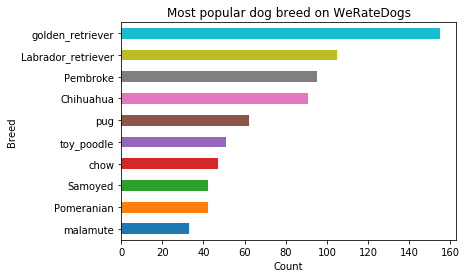

In [73]:
df_twitter_archive_cleaned.dog_breed.value_counts().head(10).sort_values().plot(kind='barh')
plt.title('Most popular dog breed on WeRateDogs')
plt.xlabel('Count')
plt.ylabel('Breed');

#### As per the bar graph above,  Golden Retiever is the winner :)

### Which dog breed has the highest average ratings?

In [75]:
df_twitter_archive_cleaned.groupby('dog_breed')['ratings'].mean().sort_values(ascending=False).head(10)

dog_breed
Bouvier_des_Flandres    1.300000
Saluki                  1.250000
briard                  1.233333
Tibetan_mastiff         1.225000
Border_terrier          1.214286
standard_schnauzer      1.200000
silky_terrier           1.200000
Gordon_setter           1.175000
Irish_setter            1.175000
Samoyed                 1.169048
Name: ratings, dtype: float64

#### Although, Bouvier_des_Flandres isn't a popular dog on the WeRateDog page, but it has the highest average rating=1.3 !!!!

### Which dog breed received the most likes (average) and which dog received the most likes?

In [78]:
df_twitter_archive_cleaned.groupby('dog_breed')['favorite_count'].mean().head(10)

dog_breed
Afghan_hound                      15737.333333
Airedale                          12150.000000
American_Staffordshire_terrier    12962.285714
Appenzeller                       11036.000000
Australian_terrier                18339.000000
Bedlington_terrier                17125.000000
Bernese_mountain_dog              10441.333333
Blenheim_spaniel                  18331.750000
Border_collie                     19238.000000
Border_terrier                    16636.800000
Name: favorite_count, dtype: float64

#### Afghan hound received the most likes in average in average

### Now, lets see the dog how received the most likes. Is he/she worth it LOL?

In [95]:
max_likes = df_twitter_archive_cleaned.favorite_count.max()
df_twitter_archive_cleaned[df_twitter_archive_cleaned.favorite_count == max_likes]

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,retweet_count,favorite_count,dog_breed,jpg_url,ratings
348,822872901745569793,2017-01-21 18:26:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,https://twitter.com/dog_rates/status/822872901745569793/photo/1,NaN,puppo,43730.0,132773.0,Lakeland_terrier,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1.3


In [94]:
from IPython.display import Image
Image(url = 'https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg', width=500)

#### we can see above the picture of the dog received most likes. As per the text column, she is from Toronto and she is gorgeous and worth the 132773 likes :) 

### Why some dogs received low rating (less than or equal 2.0)?

In [174]:
# Filter out images with rating grather 0.2

df_twitter_archive_cleaned[df_twitter_archive_cleaned.ratings <= 0.2]

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,retweet_count,favorite_count,dog_breed,jpg_url,ratings
265,835152434251116546,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",NaN,NaN,3019.0,22420.0,American_Staffordshire_terrier,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,0.0
840,746906459439529985,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",https://twitter.com/dog_rates/status/746906459439529985/photo/1,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/Cl2LdofXEAATl7x.jpg,0.0
1267,696490539101908992,2016-02-08 00:27:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After reading the comments I may have overestimated this pup. Downgraded to a 1/10. Please forgive me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1
1582,678675843183484930,2015-12-20 20:38:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Exotic pup here. Tail long af. Throat looks swollen. Might breathe fire. Exceptionally unfluffy 2/10 would still pet https://t.co/a8SqCaSo2r,https://twitter.com/dog_rates/status/678675843183484930/photo/1,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CWskEqnWUAAQZW_.jpg,0.2
1585,678424312106393600,2015-12-20 03:58:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible https://t.co/rtMtjSl9pz,https://twitter.com/dog_rates/status/678424312106393600/photo/1,Crystal,NaN,NaN,NaN,Maltese_dog,https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg,0.2
1690,675153376133427200,2015-12-11 03:21:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0,https://twitter.com/dog_rates/status/675153376133427200/photo/1,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg,0.1
1741,674265582246694913,2015-12-08 16:33:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Henry. He's a shit dog. Short pointy ears. Leaves trail of pee. Not fluffy. Doesn't come when called. 2/10 https://t.co/Pu9RhfHDEQ,https://twitter.com/dog_rates/status/674265582246694913/photo/1,Henry,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CVt49k_WsAAtNYC.jpg,0.2
1761,673716320723169284,2015-12-07 04:11:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The millennials have spoken and we've decided to immediately demote to a 1/10. Thank you,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1
1859,671550332464455680,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1
1900,670826280409919488,2015-11-29 04:47:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Scary dog here. Too many legs. Extra tail. Not soft, let alone fluffy. Won't bark. Moves sideways. Has weapon. 2/10 https://t.co/XOPXCSXiUT",https://twitter.com/dog_rates/status/670826280409919488/photo/1,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CU9A8ZuWsAAt_S1.jpg,0.2


In [177]:
Image(url='https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg', width=500)

In [182]:
Image(url='https://pbs.twimg.com/media/Cl2LdofXEAATl7x.jpg', width=500, height=500)


In [175]:
Image(url = 'https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg', width=500)

#### As you can see above, I printed some the images with ratings less or equal 0.2. I discoverd that these images are not pictures of dogs and that's why they scored such low ratings.